In [1]:
import pandas as pd
import json
import re
import string
from nltk.corpus import stopwords

In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/riyak/Downloads/All_Kindle_Review.csv')
df = pd.DataFrame(data)
df

,BookID,UserID,rating,reviewText
0,777,AV1YnR7wglJLPUi8IJmi,3,"Jace Rankin may be short, but he's nothing to ..."
1,767,AVpfpK8KLJeJML43BCuD,5,Great short read. I didn't want to put it dow...
2,1080,AVqkIdntQMlgsOJE6fuB,3,I'll start by saying this is the first of four...
3,1077,AVpfpK8KLJeJML43BCuD,3,Aggie is Angela Lansbury who carries pocketboo...
4,1049,AVpfpK8KLJeJML43BCuD,4,I did not expect this type of book to be in li...
...,...,...,...,...
629,823,B08GWV3SM6,3,"It was a good read, it is a vampire novel that..."
630,823,B08GWV3SM6,4,Have been following this series liked the book...
631,847,B08GWV3SM6,3,Just a basic game of Tic Tac Toe playing agani...
632,910,AVph0EeEilAPnD_x9myq,5,I am SO relieved the Economist is now availabl...


In [3]:
with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict

In [4]:
def emoji(text):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', text)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', text)
    # Love -- <3, :*
    text = re.sub(r'(<3|:\*)', ' positiveemoji ', text)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    text = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', text)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', text)
    # Cry -- :,(, :'(, :"(
    text = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', text)
    return text

In [5]:
def clean_text(text):
    text = str(text)
    text = text.lower()                                             # Lowercases the string
    text = re.sub('@[^\s]+', '', text)                              # Removes usernames
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)   # Remove URLs
    text = re.sub(r"\d+", " ", str(text))                           # Removes all digits
    text = re.sub('&quot;'," ", text)                               # Remove (&quot;) 
    text = emoji(text)                                              # Replaces Emojis
    text = re.sub(r"\b[a-zA-Z]\b", "", str(text))                   # Removes all single characters
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])   # Replaces contractions
    text = re.sub(r"[^\w\s]", " ", str(text))                       # Removes all punctuations
    text = re.sub(r'(.)\1+', r'\1\1', text)                         # Convert more than 2 letter repetitions to 2 letter
    text = re.sub(r"\s+", " ", str(text))                           # Replaces double spaces with single space    
    
    for char in string.punctuation:
        text = text.replace(char, '')

    x = []
    for word in text.split():
        if word not in (stop_words):
            x.append(word)
    text = ' '.join(x)

    return text

In [6]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riyak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stop_words = stopwords.words('english')

df['cleanText'] = df['reviewText'].apply(clean_text)
df


,BookID,UserID,rating,reviewText,cleanText
0,777,AV1YnR7wglJLPUi8IJmi,3,"Jace Rankin may be short, but he's nothing to ...",jace rankin may short nothing mess man hauled ...
1,767,AVpfpK8KLJeJML43BCuD,5,Great short read. I didn't want to put it dow...,great short read want put read one sitting sex...
2,1080,AVqkIdntQMlgsOJE6fuB,3,I'll start by saying this is the first of four...,start saying first four books expecting conclu...
3,1077,AVpfpK8KLJeJML43BCuD,3,Aggie is Angela Lansbury who carries pocketboo...,aggie angela lansbury carries pocketbooks inst...
4,1049,AVpfpK8KLJeJML43BCuD,4,I did not expect this type of book to be in li...,expect type book library pleased find price right
...,...,...,...,...,...
629,823,B08GWV3SM6,3,"It was a good read, it is a vampire novel that...",good read vampire novel easily catches attenti...
630,823,B08GWV3SM6,4,Have been following this series liked the book...,following series liked books characters favori...
631,847,B08GWV3SM6,3,Just a basic game of Tic Tac Toe playing agani...,basic game tic tac toe playing aganist kindle ...
632,910,AVph0EeEilAPnD_x9myq,5,I am SO relieved the Economist is now availabl...,relieved economist available kindle go hassle ...


In [8]:
!pip install textblob
from textblob import TextBlob
def sentiment (text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return None
df['sentiment'] = df['cleanText'].apply(sentiment)
df

,BookID,UserID,rating,reviewText,cleanText,sentiment
0,777,AV1YnR7wglJLPUi8IJmi,3,"Jace Rankin may be short, but he's nothing to ...",jace rankin may short nothing mess man hauled ...,0.108366
1,767,AVpfpK8KLJeJML43BCuD,5,Great short read. I didn't want to put it dow...,great short read want put read one sitting sex...,0.436136
2,1080,AVqkIdntQMlgsOJE6fuB,3,I'll start by saying this is the first of four...,start saying first four books expecting conclu...,0.237500
3,1077,AVpfpK8KLJeJML43BCuD,3,Aggie is Angela Lansbury who carries pocketboo...,aggie angela lansbury carries pocketbooks inst...,0.460000
4,1049,AVpfpK8KLJeJML43BCuD,4,I did not expect this type of book to be in li...,expect type book library pleased find price right,0.392857
...,...,...,...,...,...,...
629,823,B08GWV3SM6,3,"It was a good read, it is a vampire novel that...",good read vampire novel easily catches attenti...,0.304545
630,823,B08GWV3SM6,4,Have been following this series liked the book...,following series liked books characters favori...,0.366667
631,847,B08GWV3SM6,3,Just a basic game of Tic Tac Toe playing agani...,basic game tic tac toe playing aganist kindle ...,-0.033333
632,910,AVph0EeEilAPnD_x9myq,5,I am SO relieved the Economist is now availabl...,relieved economist available kindle go hassle ...,0.316667


In [9]:
df ['Update_score'] = df['rating']*df['sentiment']
df

,BookID,UserID,rating,reviewText,cleanText,sentiment,Update_score
0,777,AV1YnR7wglJLPUi8IJmi,3,"Jace Rankin may be short, but he's nothing to ...",jace rankin may short nothing mess man hauled ...,0.108366,0.325097
1,767,AVpfpK8KLJeJML43BCuD,5,Great short read. I didn't want to put it dow...,great short read want put read one sitting sex...,0.436136,2.180682
2,1080,AVqkIdntQMlgsOJE6fuB,3,I'll start by saying this is the first of four...,start saying first four books expecting conclu...,0.237500,0.712500
3,1077,AVpfpK8KLJeJML43BCuD,3,Aggie is Angela Lansbury who carries pocketboo...,aggie angela lansbury carries pocketbooks inst...,0.460000,1.380000
4,1049,AVpfpK8KLJeJML43BCuD,4,I did not expect this type of book to be in li...,expect type book library pleased find price right,0.392857,1.571429
...,...,...,...,...,...,...,...
629,823,B08GWV3SM6,3,"It was a good read, it is a vampire novel that...",good read vampire novel easily catches attenti...,0.304545,0.913636
630,823,B08GWV3SM6,4,Have been following this series liked the book...,following series liked books characters favori...,0.366667,1.466667
631,847,B08GWV3SM6,3,Just a basic game of Tic Tac Toe playing agani...,basic game tic tac toe playing aganist kindle ...,-0.033333,-0.100000
632,910,AVph0EeEilAPnD_x9myq,5,I am SO relieved the Economist is now availabl...,relieved economist available kindle go hassle ...,0.316667,1.583333


In [10]:
l =[-1,-0.75,-0.50,-0.25,0,0.25,0.50,0.75,1]
list1 = []
for i in l:
    list1.append(1*i)
    list1.append(2*i)
    list1.append(3*i)
    list1.append(4*i)
    list1.append(5*i)

list1.sort()

set1 = set(list1)

In [11]:
df['Update_score'] = df['Update_score'].astype(int)
v = []

for i in df.Update_score:
    if i >= -5 and i < 0:
        v.append(1)
    elif i >= 0 and i < 1:
        v.append(2)
    elif i >= 1 and i < 3:
        v.append(3)
    elif i >= 3 and i < 4:
        v.append(4)
    elif i >= 4 and i < 5:
        v.append(5)
    else :
        v.append(6)
df['New_score'] = v
df

,BookID,UserID,rating,reviewText,cleanText,sentiment,Update_score,New_score
0,777,AV1YnR7wglJLPUi8IJmi,3,"Jace Rankin may be short, but he's nothing to ...",jace rankin may short nothing mess man hauled ...,0.108366,0,2
1,767,AVpfpK8KLJeJML43BCuD,5,Great short read. I didn't want to put it dow...,great short read want put read one sitting sex...,0.436136,2,3
2,1080,AVqkIdntQMlgsOJE6fuB,3,I'll start by saying this is the first of four...,start saying first four books expecting conclu...,0.237500,0,2
3,1077,AVpfpK8KLJeJML43BCuD,3,Aggie is Angela Lansbury who carries pocketboo...,aggie angela lansbury carries pocketbooks inst...,0.460000,1,3
4,1049,AVpfpK8KLJeJML43BCuD,4,I did not expect this type of book to be in li...,expect type book library pleased find price right,0.392857,1,3
...,...,...,...,...,...,...,...,...
629,823,B08GWV3SM6,3,"It was a good read, it is a vampire novel that...",good read vampire novel easily catches attenti...,0.304545,0,2
630,823,B08GWV3SM6,4,Have been following this series liked the book...,following series liked books characters favori...,0.366667,1,3
631,847,B08GWV3SM6,3,Just a basic game of Tic Tac Toe playing agani...,basic game tic tac toe playing aganist kindle ...,-0.033333,0,2
632,910,AVph0EeEilAPnD_x9myq,5,I am SO relieved the Economist is now availabl...,relieved economist available kindle go hassle ...,0.316667,1,3


In [12]:
df_pivot = df.pivot_table(index='BookID',columns='UserID',values='New_score').fillna(0)
df_pivot

UserID,AV1YnR7wglJLPUi8IJmi,AVpfIfGA1cnluZ0-emyp,AVpf_4sUilAPnD_xlwYV,AVpfpK8KLJeJML43BCuD,AVpftoij1cnluZ0-p5n2,AVpfwS_CLJeJML43DH5w,AVpgdkC8ilAPnD_xsvyi,AVph0EeEilAPnD_x9myq,AVphLY7v1cnluZ0-_Ty0,AVphgVaX1cnluZ0-DR74,...,B07MXKMWT5,B07NLR9YPZ,B07Q2B5Z9D,B07S55SML2,B07VYRQFBJ,B0818ZYVH1,B082KY37BL,B0832PGNNH,B08DLL7C2D,B08GWV3SM6
BookID,,,,,,,,,,,,,,,,,,,,,
89,0.0,0.00,0.000000,3.0,0.0,0.0,3.0,2.000000,3.000000,0.0,...,0.000000,2.0,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,2.25
333,0.0,2.00,0.000000,0.0,0.0,2.0,0.0,0.000000,2.333333,2.5,...,0.000000,3.0,2.333333,0.0,0.000000,2.500000,0.000000,0.000000,0.000000,0.00
369,3.0,3.00,0.000000,3.0,0.0,3.0,3.0,2.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.000000,0.000000,2.000000,0.00
444,3.0,2.00,0.000000,0.0,2.5,0.0,2.0,2.000000,2.000000,0.0,...,2.000000,0.0,2.500000,0.0,0.000000,2.666667,0.000000,0.000000,2.666667,0.00
684,0.0,0.00,2.000000,2.5,2.0,0.0,2.5,3.000000,2.000000,0.0,...,2.500000,0.0,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.00
697,0.0,2.00,3.000000,0.0,0.0,0.0,3.0,0.000000,2.000000,3.0,...,3.000000,2.0,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.00
767,2.0,0.00,0.000000,3.0,0.0,0.0,2.0,0.000000,0.000000,0.0,...,0.000000,2.0,0.000000,0.0,2.000000,0.000000,2.000000,2.000000,0.000000,0.00
777,2.0,0.00,0.000000,0.0,0.0,0.0,2.0,0.000000,0.000000,3.0,...,0.000000,2.0,0.000000,0.0,0.000000,0.000000,3.000000,0.000000,0.000000,0.00
823,0.0,0.00,0.000000,2.0,0.0,0.0,3.0,2.000000,0.000000,0.0,...,0.000000,2.0,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,2.50


In [13]:
from scipy.sparse import csr_matrix

df_pivot_matrix = csr_matrix(df_pivot.values) 
print(df_pivot_matrix)

  (0, 3)	3.0
  (0, 6)	3.0
  (0, 7)	2.0
  (0, 8)	3.0
  (0, 11)	2.0
  (0, 16)	2.5
  (0, 18)	2.4
  (0, 20)	2.0
  (0, 22)	2.0
  (0, 28)	2.0
  (0, 33)	2.0
  (0, 37)	2.0
  (0, 41)	2.25
  (1, 1)	2.0
  (1, 5)	2.0
  (1, 8)	2.3333333333333335
  (1, 9)	2.5
  (1, 10)	3.0
  (1, 13)	2.0
  (1, 17)	2.5
  (1, 22)	2.0
  (1, 25)	2.25
  (1, 29)	2.5
  (1, 33)	3.0
  (1, 34)	2.3333333333333335
  :	:
  (25, 17)	2.5
  (25, 21)	2.0
  (25, 22)	2.0
  (25, 25)	2.6666666666666665
  (25, 30)	2.3333333333333335
  (25, 38)	2.3333333333333335
  (25, 40)	3.0
  (26, 0)	2.0
  (26, 1)	2.0
  (26, 3)	2.0
  (26, 6)	2.0
  (26, 7)	2.0
  (26, 8)	2.0
  (26, 9)	3.0
  (26, 11)	2.6666666666666665
  (26, 16)	2.0
  (26, 17)	2.2
  (26, 18)	2.0
  (26, 19)	2.5
  (26, 22)	2.0
  (26, 23)	2.0
  (26, 25)	2.3333333333333335
  (26, 28)	2.0
  (26, 33)	2.5
  (26, 37)	2.5


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(df_pivot)
similarity_matrix

array([[1.        , 0.29932848, 0.31526545, 0.3885643 , 0.7334191 ,
        0.38708133, 0.40152912, 0.32787314, 0.81567332, 0.41018293,
        0.23088637, 0.3767016 , 0.59684277, 0.53598544, 0.35913563,
        0.13772524, 0.3680597 , 0.16166779, 0.2167137 , 0.24931833,
        0.45940717, 0.39308301, 0.17776998, 0.        , 0.4492067 ,
        0.13074041, 0.68782762],
       [0.29932848, 1.        , 0.44992581, 0.43180273, 0.19273527,
        0.5403036 , 0.28670551, 0.16694031, 0.29148725, 0.23477698,
        0.23035776, 0.32618224, 0.38947416, 0.52661357, 0.32600962,
        0.19507847, 0.07926128, 0.07045891, 0.27390301, 0.        ,
        0.34186716, 0.33481307, 0.26148371, 0.        , 0.59667077,
        0.43447233, 0.54644172],
       [0.31526545, 0.44992581, 1.        , 0.45513098, 0.31206054,
        0.40579589, 0.5093234 , 0.23195732, 0.37905933, 0.43143615,
        0.19607864, 0.34901949, 0.40534856, 0.24709312, 0.22732177,
        0.29803701, 0.12649978, 0.50533688, 0.3634

In [15]:
def func(x):
    if x < 0:
        v = 'Negative'
    elif x == 0:
        v = 'Neutral'
    else:
        v = 'Positive'
    return v
df['Sentiment_Type'] = df['sentiment'].apply(func)
df




,BookID,UserID,rating,reviewText,cleanText,sentiment,Update_score,New_score,Sentiment_Type
0,777,AV1YnR7wglJLPUi8IJmi,3,"Jace Rankin may be short, but he's nothing to ...",jace rankin may short nothing mess man hauled ...,0.108366,0,2,Positive
1,767,AVpfpK8KLJeJML43BCuD,5,Great short read. I didn't want to put it dow...,great short read want put read one sitting sex...,0.436136,2,3,Positive
2,1080,AVqkIdntQMlgsOJE6fuB,3,I'll start by saying this is the first of four...,start saying first four books expecting conclu...,0.237500,0,2,Positive
3,1077,AVpfpK8KLJeJML43BCuD,3,Aggie is Angela Lansbury who carries pocketboo...,aggie angela lansbury carries pocketbooks inst...,0.460000,1,3,Positive
4,1049,AVpfpK8KLJeJML43BCuD,4,I did not expect this type of book to be in li...,expect type book library pleased find price right,0.392857,1,3,Positive
...,...,...,...,...,...,...,...,...,...
629,823,B08GWV3SM6,3,"It was a good read, it is a vampire novel that...",good read vampire novel easily catches attenti...,0.304545,0,2,Positive
630,823,B08GWV3SM6,4,Have been following this series liked the book...,following series liked books characters favori...,0.366667,1,3,Positive
631,847,B08GWV3SM6,3,Just a basic game of Tic Tac Toe playing agani...,basic game tic tac toe playing aganist kindle ...,-0.033333,0,2,Negative
632,910,AVph0EeEilAPnD_x9myq,5,I am SO relieved the Economist is now availabl...,relieved economist available kindle go hassle ...,0.316667,1,3,Positive


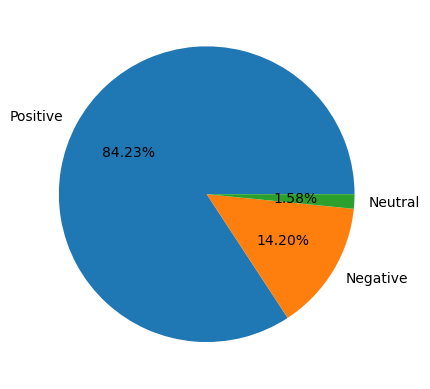

In [16]:
from matplotlib import pyplot as plt
data = df['Sentiment_Type'].value_counts()
plt.pie(data, labels=data.index.tolist(),autopct="%.2f%%")
plt.show()



In [17]:
c1 = 0
c2 = 0
c3 = 0
c4 = 0
c5 = 0

for i in df.rating:
   
    if i == 1:
        c1 += 1
    elif i == 2:
        c2 += 1
    elif i == 3:
        c3 += 1
    elif i == 4:
        c4 += 1
    elif i == 5:
        c5 += 1
print(c1, c2, c3, c4, c5)
l = [c1,c2,c3,c4,c5]
print(l)



94 102 109 161 168
[94, 102, 109, 161, 168]


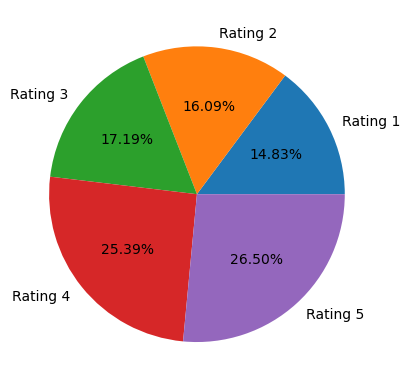

In [18]:
from matplotlib import pyplot as plt
name = ['Rating 1','Rating 2','Rating 3','Rating 4','Rating 5']
plt.pie(l,labels = name,autopct="%.2f%%")

plt.show()

In [19]:
c1 = 0
c2 = 0
c3 = 0
c4 = 0
c5 = 0

for i in df.New_score:
   
    if i == 1:
        c1 += 1
    elif i == 2:
        c2 += 1
    elif i == 3:
        c3 += 1
    elif i == 4:
        c4 += 1
    elif i == 5:
        c5 += 1
print(c1, c2, c3, c4, c5)
l = [c1,c2,c3,c4,c5]
print(l)

# Create a dictionary to store the counts
counts_dict = {'Rating 1': c1, 'Rating 2': c2, 'Rating 3': c3, 'Rating 4': c4, 'Rating 5': c5}

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame(list(counts_dict.items()), columns=['Rating', 'Count'])

# Save the counts DataFrame to a CSV file
counts_df.to_csv('rating_counts.csv', index=False)

# Save the counts as a text file
with open('rating_counts.txt', 'w') as f:
    for key, value in counts_dict.items():
        f.write(f'{key}: {value}\n')


1 398 221 10 2
[1, 398, 221, 10, 2]


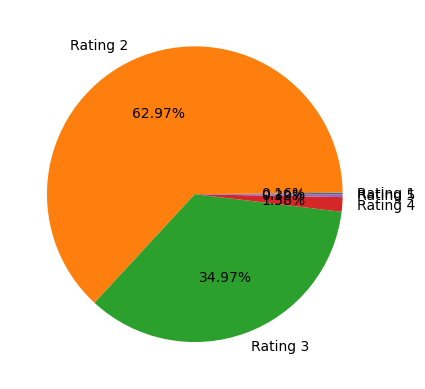

In [20]:
from matplotlib import pyplot as plt
name = ['Rating 1','Rating 2','Rating 3','Rating 4','Rating 5']
plt.pie(l,labels = name,autopct="%.2f%%")

plt.show()

In [21]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', n_neighbors= 20, radius = 1)
model_knn.fit(df_pivot_matrix)

book_id = int(input("Enter book_id"))
data = list(df_pivot.index)
# print(data)
query_index = data.index(book_id)
# print(query_index)

similarity, indices = model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 8)
print("\nNearest Neighbours : ",df_pivot.index[indices.flatten()])
print("\nDistance : ",similarity)
print("\nIndices : ",indices)



Enter book_id777

Nearest Neighbours :  Index([777, 767, 1080, 9696, 1077, 444, 697, 1095], dtype='int64', name='BookID')

Distance :  [[0.         0.38350275 0.44709513 0.56534566 0.56779993 0.59770351
  0.62631042 0.63095963]]

Indices :  [[ 7  6 21 26 20  3  5 22]]


In [23]:
i=df_pivot.index[indices.flatten()]
d=similarity.flatten()

new=list(zip(i,d))

pd.DataFrame(new)


# Convert results to DataFrame
#results_df = pd.DataFrame({'BookID': df_pivot.index[indices.flatten()], 'Distance': similarity.flatten()})

# Save results to CSV
#results_df.to_csv('nearest_neighbors_results.csv', index=False)


,0,1
0,777,0.000000
1,767,0.383503
2,1080,0.447095
3,9696,0.565346
4,1077,0.567800
5,444,0.597704
6,697,0.626310
7,1095,0.630960
